In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [56]:
data = pd.read_csv('Iris.csv')

In [57]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [58]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [60]:
data.shape

(150, 6)

In [61]:
X = data.drop('Species', axis=1)
y = data['Species']

In [62]:
X.shape
y.shape

(150,)

In [63]:
X.shape

(150, 5)

In [64]:
data.drop('Id', axis=1, inplace=True)

In [65]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [66]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [67]:
X.drop('Id', axis=1, inplace=True)

In [68]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [69]:
X.shape

(150, 4)

In [70]:
y.shape

(150,)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [72]:
X_test.shape

(30, 4)

In [73]:
# Inisialisasi model Logistic Regression dengan regularisasi (C)
# Nilai default C adalah 1.0. Menurunkan C (misalnya, menjadi 0.1) akan meningkatkan regularisasi
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, C=0.1)

In [74]:
model.fit(X_train, y_train)

c:\Users\MyBook Hype AMD\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'multinomial'


In [75]:
model.fit(X_train, y_train)

c:\Users\MyBook Hype AMD\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'multinomial'


In [76]:
y_pred = model.predict(X_test)

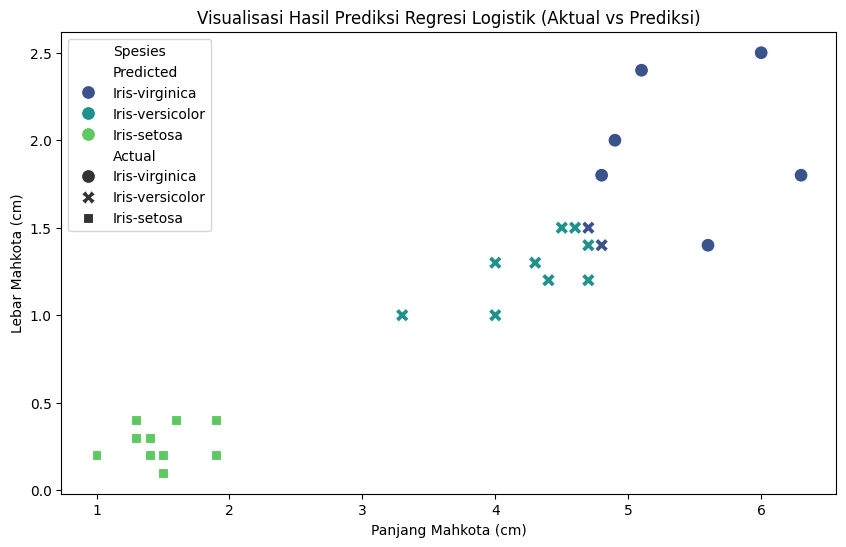

In [77]:
# Visualisasi Hasil Prediksi (Scatter Plot)
df_test = pd.DataFrame(X_test)
df_test['Actual'] = y_test
df_test['Predicted'] = y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Predicted', style='Actual', data=df_test, palette='viridis', s=100)
plt.title('Visualisasi Hasil Prediksi Regresi Logistik (Aktual vs Prediksi)')
plt.xlabel('Panjang Mahkota (cm)')
plt.ylabel('Lebar Mahkota (cm)')
plt.legend(title='Spesies')
plt.show()

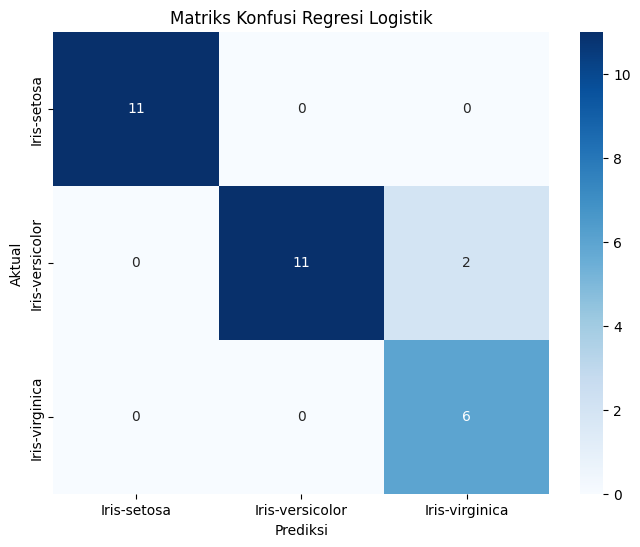

In [78]:
# Visualisasi Matriks Konfusi (Heatmap)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Matriks Konfusi Regresi Logistik')
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()

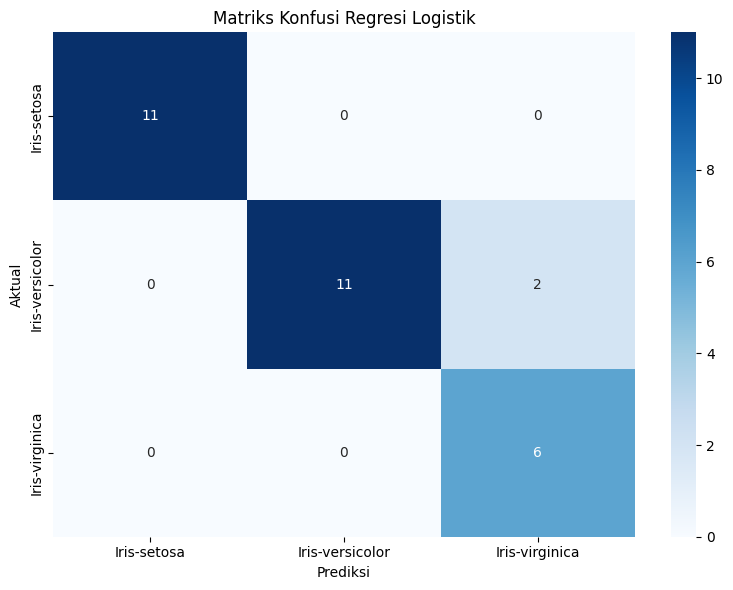

In [79]:
# Visualisasi Matriks Konfusi (Heatmap)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Matriks Konfusi Regresi Logistik')
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.tight_layout()
plt.show()

In [80]:
print(f"\nAkurasi Model: {accuracy_score(y_test, y_pred):.2f}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Akurasi Model: 0.93

Laporan Klasifikasi:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.75      1.00      0.86         6

       accuracy                           0.93        30
      macro avg       0.92      0.95      0.92        30
   weighted avg       0.95      0.93      0.94        30



In [81]:
jumlah_sampel = 5
jumlah_fitur = 4
data_baru_acak = np.random.rand(jumlah_sampel, jumlah_fitur) * 10
kolom = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
data_baru_df = pd.DataFrame(data_baru_acak, columns=kolom)

print("\nData Baru untuk Prediksi:")
print(data_baru_df)

# Lakukan prediksi pada data baru
prediksi_baru = model.predict(data_baru_df)

# Tampilkan hasilnya
data_baru_df['Prediksi Spesies'] = prediksi_baru
print("\nHasil Prediksi untuk Data Baru:")
print(data_baru_df)


Data Baru untuk Prediksi:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0       3.253738      0.444035       9.175252      0.068876
1       0.451854      0.364145       8.686074      6.058216
2       9.446978      8.458124       4.769252      5.917824
3       4.095087      7.640507       5.703037      0.316596
4       4.016884      0.726813       8.756005      0.153601

Hasil Prediksi untuk Data Baru:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Prediksi Spesies
0       3.253738      0.444035       9.175252      0.068876   Iris-virginica
1       0.451854      0.364145       8.686074      6.058216   Iris-virginica
2       9.446978      8.458124       4.769252      5.917824   Iris-virginica
3       4.095087      7.640507       5.703037      0.316596   Iris-virginica
4       4.016884      0.726813       8.756005      0.153601   Iris-virginica


In [82]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [83]:
# prediksi pada data training
y_train_pred = model.predict(X_train)

# akurasi pada data training
akurasi_train = accuracy_score(y_train, y_train_pred)
print(f"Akurasi Model pada Data Training: {akurasi_train:.2f}")

# Akurasi pada data testing
akurasi_test = accuracy_score(y_test, y_pred)
print(f"Akurasi Model pada Data Testing: {akurasi_test:.2f}")

# Periksa tanda-tanda overfitting
if akurasi_train > akurasi_test + 0.05:
    print("\nIndikasi OVERFITTING: Akurasi training jauh lebih tinggi dari akurasi testing.")
elif akurasi_train < 0.7 and akurasi_test < 0.7:
    print("\nIndikasi UNDERFITTING: Akurasi training dan testing sama-sama rendah.")
else:
    print("\nModel memiliki performa yang konsisten pada data training dan testing (good fit).")

Akurasi Model pada Data Training: 0.93
Akurasi Model pada Data Testing: 0.93

Model memiliki performa yang konsisten pada data training dan testing (good fit).


In [84]:
from sklearn.model_selection import cross_val_score

# validasi silang dengan 5 lipatan (cv=5)
scores_logreg = cross_val_score(model, X, y, cv=5)

print(f"\nSkor Validasi Silang: {scores_logreg}")
print(f"Akurasi Rata-rata: {scores_logreg.mean():.2f}")


Skor Validasi Silang: [0.86666667 0.96666667 0.93333333 0.96666667 1.        ]
Akurasi Rata-rata: 0.95


c:\Users\MyBook Hype AMD\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\MyBook Hype AMD\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\MyBook Hype AMD\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\MyBook 

In [85]:
print(f"\nAkurasi Model: {accuracy_score(y_test, y_pred):.2f}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Akurasi Model: 0.93

Laporan Klasifikasi:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.75      1.00      0.86         6

       accuracy                           0.93        30
      macro avg       0.92      0.95      0.92        30
   weighted avg       0.95      0.93      0.94        30

